# Задание 1. A/B–тестирование

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# импортируем данные
# во время импорт обнаружил, что разделитель ";"
gr = pd.read_csv('groups.csv', sep=';')
gr.head()


,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [3]:
gr1 = pd.read_csv('group_add.csv')
gr1.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [4]:
# проверим на всякий типы дынных
print(gr.dtypes)
print()
print(gr1.dtypes)

id      int64
grp    object
dtype: object

id      int64
grp    object
dtype: object


In [5]:
# проверим есть ли пропуски в данных
print(gr.isnull().sum())
print()
print(gr1.isnull().sum())

id     0
grp    0
dtype: int64

id     0
grp    0
dtype: int64


In [6]:
# оценим размер датасетов
print(gr.shape)
print()
print(gr1.shape)

(74484, 2)

(92, 2)


In [7]:
# объеденим оба датасета в один
users=pd.concat([gr, gr1])
users.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [8]:
# Посмотрим сколько пользователей в какой группе
users.grp.value_counts()

B    59883
A    14693
Name: grp, dtype: int64

In [9]:
active_studs=pd.read_csv('active_studs.csv')
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [10]:
# Проверим тип данных
active_studs.dtypes

student_id    int64
dtype: object

In [11]:
checks=pd.read_csv('checks.csv', sep=';')
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [12]:
# для удобства сделаем rename столбца ID в users
users=users.rename(columns={'id': 'student_id'})
users.head()

,student_id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [13]:
# Проверим тип данных
checks.dtypes

student_id      int64
rev           float64
dtype: object

In [14]:
# проверим есть ли пропуски в данных
checks.isnull().sum()

student_id    0
rev           0
dtype: int64

Полагаю, что rev - сумма оплаты. Посмотрим, какие есть значения суммы в датасете

In [15]:
checks.rev.value_counts()

1900.0000    97
290.0000     94
690.0000     78
199.0000     46
990.0000     41
1900.0001    36
840.0000     27
1140.0000    25
580.0000     15
590.0000     11
398.0000      9
1530.0000     8
870.0000      6
3660.0000     5
1980.0000     4
2890.0000     4
2910.0000     4
489.0000      3
1160.0000     3
2099.0000     3
2820.0000     2
1180.0000     2
2220.0000     2
2900.0000     1
1830.0000     1
597.0000      1
1339.0000     1
1968.0000     1
1050.0000     1
630.0000      1
1729.0000     1
1388.0000     1
2190.0000     1
4650.0000     1
796.0000      1
3040.0000     1
880.0000      1
3260.0000     1
1039.0000     1
Name: rev, dtype: int64

#### Посмотрим на описательную статистику суммы оплаты и построим гистограмму

In [16]:
checks.rev.describe()

count     541.000000
mean     1059.752317
std       762.712359
min       199.000000
25%       290.000000
50%       840.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

Видим, что медиана меньше среднего, значит, скорее всего, распределение скошено влево. Кроме того, 75% значений находятся до 1900, а максимальное значение 4650, что может свидетельствовать о выбросах в данных и ненормальном характере распределения

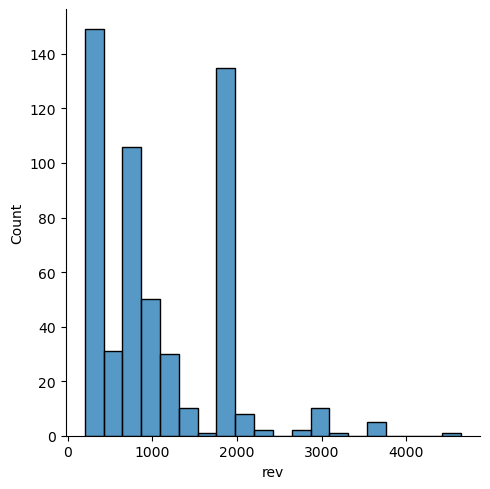

In [17]:
# построим график распределения значений, посмотрим визуально на форму рапределения
sns.displot(checks.rev, bins=20);

___

### Объединим все 4 датасета в 1. За основу принимаю решение взять датасет active_studs, т.к. тестируем разлиия в способе оплаты, т.е. изменения увидят только те пользователи, которые уже зашли на платформу

In [18]:
active_studs_w_gr = active_studs.merge(users, on = 'student_id')
active_studs_w_gr.head()

,student_id,grp
0,581585,A
1,5723133,A
2,3276743,B
3,4238589,A
4,4475369,B


In [19]:
final_dataset = active_studs_w_gr.merge(checks, on = 'student_id', how = 'left')
final_dataset.head()

,student_id,grp,rev
0,581585,A,NaN
1,5723133,A,NaN
2,3276743,B,NaN
3,4238589,A,NaN
4,4475369,B,NaN


In [20]:
# Проверим себя по колиеству записей
print(active_studs.shape)
print(active_studs_w_gr.shape)
print(final_dataset.shape)

(8341, 1)
(8341, 2)
(8341, 3)


In [21]:
# заменим пустые значения в датафрейме на 0
final_dataset = final_dataset.fillna(0)

In [22]:
final_dataset.rev.value_counts()

0.0000       7949
1900.0000      93
290.0000       70
1900.0001      35
199.0000       32
840.0000       24
990.0000       22
690.0000       17
590.0000       11
580.0000       11
1140.0000      11
1530.0000       8
398.0000        7
870.0000        6
3660.0000       5
2910.0000       4
2890.0000       4
2099.0000       3
1160.0000       3
489.0000        3
1980.0000       3
2820.0000       2
2220.0000       2
1388.0000       1
796.0000        1
880.0000        1
1968.0000       1
3260.0000       1
3040.0000       1
2190.0000       1
1339.0000       1
4650.0000       1
1180.0000       1
1050.0000       1
1729.0000       1
1830.0000       1
1039.0000       1
2900.0000       1
597.0000        1
Name: rev, dtype: int64

добавлю колонку is_payment - будет означать был совершен платеж или нет. Потом посмотрим на Payment Ratio по группам 

In [23]:
final_dataset['is_payment'] = final_dataset.rev.apply(lambda x: 1 if x > 0 else 0)

In [24]:
final_dataset.groupby('grp', as_index = False)\
    .agg({'is_payment':'mean'})

,grp,is_payment
0,A,0.050715
1,B,0.046156


### Видим, что в целевой группе (B) payment ratio ниже, чем в тестовой (A). 4.6% против 5.07%

#### Протестируем нулевую гипотезу о том, что различия по числу пользователей совершивших оплату не зависят от группы, в которой они находятся

In [25]:
# используем критерий Хи-квадрат
from scipy.stats import chi2_contingency

In [26]:
for_test = pd.crosstab(final_dataset.grp, final_dataset.is_payment)
for_test.head()

is_payment,0,1
grp,,
A,1460,78
B,6489,314


In [27]:
stats, pval, ddof, exp_f = chi2_contingency(for_test)

In [28]:
pval

0.48625240457231045

In [29]:
exp_f

array([[1465.71897854,   72.28102146],
       [6483.28102146,  319.71897854]])

### <U> P-value значительно выше порога, значит, у нас нет оснований отклонить нулевую гипотезу о отсутсвии различий в группах пользователей

___

### Посмотрим на средний чек в двух группах
#### Для этого оставим только тех, кто совершил оплату

In [30]:
payed = final_dataset.query('rev > 0')
payed.head()

,student_id,grp,rev,is_payment
62,1184303,A,1530.0000,1
67,3354191,B,1900.0001,1
77,3278734,B,1900.0000,1
99,720651,A,1980.0000,1
193,1232221,B,1900.0000,1


In [31]:
payed.groupby('grp', as_index = False)\
    .agg({'rev':'mean'})\
    .rename(columns = {'rev':'avg_payment'})

,grp,avg_payment
0,A,933.589744
1,B,1257.878992


#### Видим, что средний чек в двух группах различается в пользу целевой группы

##### Для того, чтобы выбрать, какой статистический критерий будем использовать проверим наши данные на нормальность и наличие выбросов

In [32]:
payed.query("grp == 'A'").rev.describe()

count      78.000000
mean      933.589744
std       919.932711
min       199.000000
25%       290.000000
50%       585.000000
75%      1114.750000
max      3660.000000
Name: rev, dtype: float64

In [33]:
payed.query("grp == 'B'").rev.describe()

count     314.000000
mean     1257.878992
std       790.864254
min       199.000000
25%       511.750000
50%      1140.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

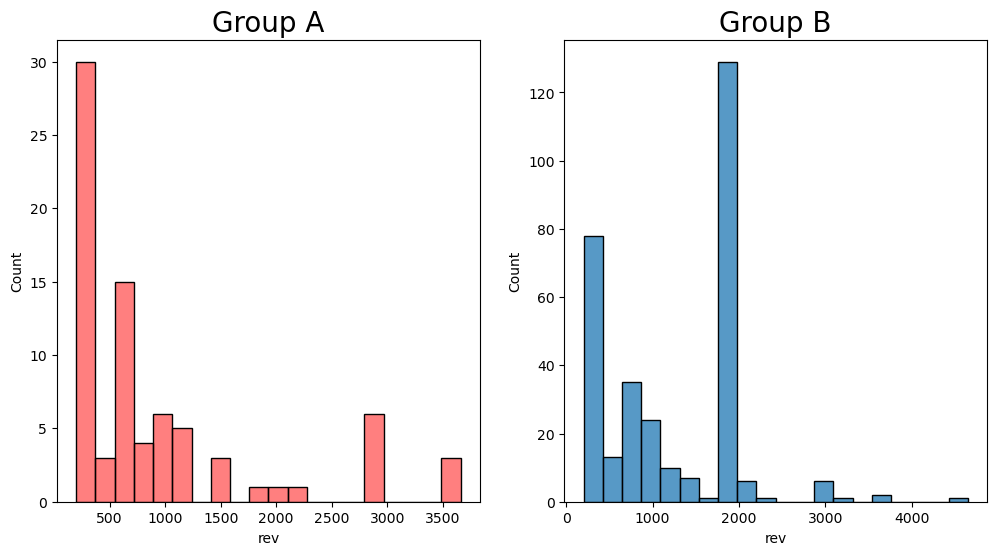

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1 = sns.histplot(payed.query("grp == 'A'").rev, ax=ax1, kde = False, bins = 20, color = 'red', alpha = 0.5)
ax1.set_title('Group A', fontsize = 20)
ax2 = sns.histplot(payed.query("grp == 'B'").rev, ax=ax2, kde = False, bins = 20)
ax2.set_title('Group B', fontsize = 20);


Визуально, распределение отличается от номального. Применим еще тест на нормальность

In [35]:
from scipy.stats import normaltest

In [36]:
print('Results for grp A')
print(normaltest(payed.query("grp == 'A'").rev))
print()
print('Results for grp B')
print(normaltest(payed.query("grp == 'B'").rev))

Results for grp A
NormaltestResult(statistic=30.378419638487458, pvalue=2.531686880422046e-07)

Results for grp B
NormaltestResult(statistic=6.795662714490353, pvalue=0.03344572319462542)


<b>P-value в обоих группах меньше 0,05, значит, есть основания отлонить нулевую гипотезу о том, что выборка взята из нормального распределения</b>
<br><br>
### Т.к. распределения наших знаений отличаются от нормального и имеют заметные выбросы, будем исполльзовать тест Мана-Уитни

In [37]:
from scipy.stats import mannwhitneyu

In [38]:
mannwhitneyu(payed.query("grp == 'A'").rev, payed.query("grp == 'B'").rev)

MannwhitneyuResult(statistic=9001.0, pvalue=0.0002511393831406922)

## Вывод:

### Имеем снижение payment ratio в целевой группе, хотя тест показал, что различия с контрольной группой незначимые, они есть. Средний чек в целевой группе увеличился и различия являются значимыми. По условию, изменения коснулись механики оплаты, значит, по идее, разница должны быть скорее в payment ratio, нежели в размере среднего чека. В данном месте, я бы предложил оценить payment ratio с историческими значениями, насколько велико снижение отногсительно исторических данных, а так же рассмотреть вопрос о продолжении эксперимента.

# Задание 2. SQL

### 2.1 Очень усердные ученики

In [39]:
import pandahouse as ph

In [40]:
connection = dict(database = 'default',
                  host = 'https://clickhouse.lab.karpov.courses',
                  user = 'student',
                  password = 'dpo_python_2020')

In [41]:
assiduous_students = """
select month, count(st_id) as count_of_assiduous_students
from (
    select st_id, toStartOfMonth(timest) as month, sum(correct) as score from default.peas 
    group by st_id, month 
    having score >= 20) as SUBQ
group by month    
order by count_of_assiduous_students DESC
"""
df_assiduous_student = ph.read_clickhouse(assiduous_students, connection = connection)
df_assiduous_student

,month,count_of_assiduous_students
0,2021-10-01,136


#### Таблица содержит только 1 месяц, но я добавил еще месяц в селект, чтобы можно было делать разбивку по месяцам, в случае необходимости

### 2.2 Оптимизация воронки

In [42]:
funnel = """
select test_grp, 
(total_sale / tot_count_st) as ARPU,
(total_sale / active_st) as ARPAU,
(cnt_made_purch / tot_count_st) *100 as CR_to_purchase,
(cnt_made_purch / active_st) * 100 as CR_active_to_purch,
(cnt_purch_math / cnt_active_math) *100  as CR_act_math_to_purch_math
from( 
    
    select test_grp, sum(sale) as total_sale, count(st_id) as tot_count_st, 
    count(distinct is_active) as active_st, count(distinct is_active_math) as cnt_active_math, 
    count(distinct made_purchase) as cnt_made_purch, count(distinct made_purchase_math) as cnt_purch_math
    from(
        select st.st_id as st_id, 
        st.test_grp as test_grp, 
        pr.money as sale,
        pr.subject as buy_subj,
        act.st_id as is_active,
        act_math.st_id as is_active_math,
        purch.st_id as made_purchase,
        purch_math.st_id as made_purchase_math
        from default.studs st
        left join default.final_project_check pr on pr.st_id = st.st_id
        left join (select st_id from default.peas group by st_id having sum(correct) > 10) as act on act.st_id = st.st_id
        left join (select st_id from default.peas where subject = 'Math' group by st_id  having sum(correct) >= 2) as act_math on act_math.st_id = st.st_id
        left join (select distinct st_id from default.final_project_check) as purch on purch.st_id = st.st_id
        left join (select distinct st_id from default.final_project_check where subject = 'Math') as purch_math on purch_math.st_id = st.st_id)
    group by test_grp)
"""
df_funnel = ph.read_clickhouse(funnel, connection = connection)
df_funnel

,test_grp,ARPU,ARPAU,CR_to_purchase,CR_active_to_purch,CR_act_math_to_purch_math
0,control,4496.753247,10820.3125,5.194805,12.500000,18.000000
1,pilot,11094.771242,35000.0000,10.784314,34.020619,39.534884


# Задание 3. Python

#### 3.1 Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

In [43]:
groups = pd.read_csv('groups.csv', sep = ';') 

In [53]:
def add_data(link):
    file_name = 'group_add.csv'
    try:
        
        add_df = pd.read_csv(link + '/' + file_name, header = 0, names = ['id','grp'])
        users = pd.concat([groups, add_df])
        users = users.rename(columns = {'id':'student_id'})
        active_studs = pd.read_csv('active_studs.csv')
        checks = pd.read_csv('checks.csv', sep= ';')
        active_studs_w_gr = active_studs.merge(users, on = 'student_id')
        final_dataset = active_studs_w_gr.merge(checks, on = 'student_id', how = 'left')
        final_dataset = final_dataset.fillna(0)
        final_dataset['is_payment'] = final_dataset.rev.apply(lambda x: 1 if x > 0 else 0)
        global payment_ratio
        payment_ratio = final_dataset.groupby('grp', as_index = False)\
                                     .agg({'is_payment':'mean'})\
                                     .rename(columns = {'grp':'Group', 'is_payment':'payment_ratio'})
        payment_ratio['payment_ratio'] = payment_ratio.payment_ratio.mul(100)
        payed = final_dataset.query('rev > 0')
        global avg_payment
        avg_payment = payed.groupby('grp', as_index = False)\
             .agg({'rev':'mean'})\
             .rename(columns = {'grp':'Group', 'rev':'Avg_payment'})
        print('Payment ratio by group')
        print(payment_ratio.to_string(index = False)) 
        print()
        print('Average payment')
        print(avg_payment.to_string(index = False))
    except FileNotFoundError:
        print('File ' + file_name + ' in folder ' + link + ' does not exist')
       
    

In [72]:
add_data('C:/Users/бвс/Carpov_Courses/Final_project')

Payment ratio by group
Group  payment_ratio
    A       5.071521
    B       4.615611

Average payment
Group  Avg_payment
    A   933.589744
    B  1257.878992


#### 3.2 Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [70]:
def draw_plot():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1 = sns.barplot(data = avg_payment, x = 'Group', y = 'Avg_payment',  ax = ax1, )
    ax1.set_title('Average payment by groups', fontsize = 15)
    ax1.set_xlabel('Group')
    ax1.set_ylabel('Sum of payment')
    ax2 = sns.barplot(data = payment_ratio, x = 'Group', y = 'payment_ratio',  ax = ax2)
    ax2.set_title('Payment ratio by groups', fontsize = 15)
    ax2.set_xlabel('Group')
    ax2.set_ylabel('Ratio')
    plt.show()
    

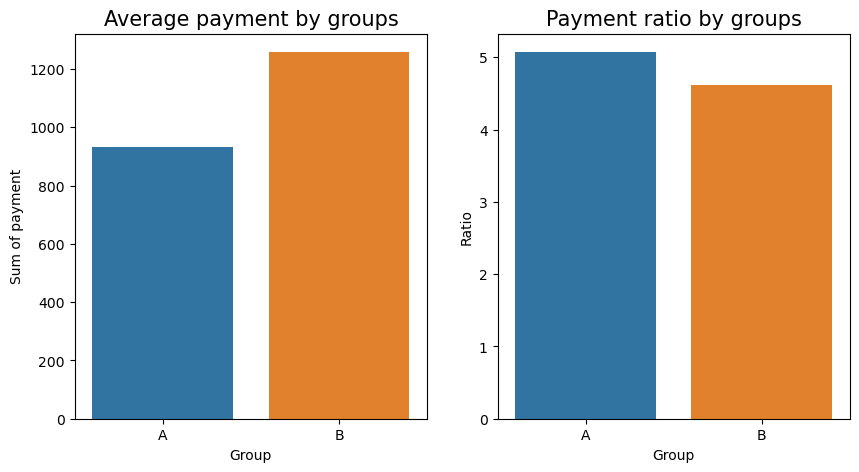

In [71]:
draw_plot()